In [1]:
# Incorrect way
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.datasets import mnist

import keras
from keras import layers
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Data preparation
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2025-04-18 23:37:29.662144: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


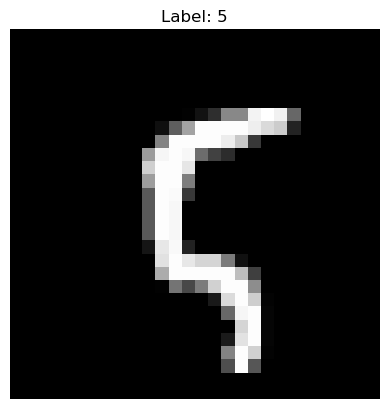

In [2]:
image_index = 100  # Change this index to view a different image
image = train_images[image_index]
label = train_labels[image_index]

# Display the image
plt.imshow(image, cmap='gray')  # Display in grayscale
plt.title(f"Label: {label}")  # Show label as title
plt.axis("off")  # Remove axis for better visualization
plt.show()

In [3]:
train_images[image_index]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
print(train_labels)

[5 0 4 ... 5 6 8]


Why do we **reshape and normalize** images in Deep Learning?
When working with image data in deep learning, preprocessing steps such as reshaping and normalization are essential to ensure the model 
can effectively learn patterns from the data. These steps improve computational efficiency, optimize model training, and ensure stable gradient updates.
    
- ***Reshaping the Images***:
    Images in datasets like MNIST are typically stored as two-dimensional arrays representing pixel intensity values. 
    For example, an MNIST image is a 28×28 matrix, meaning each image has 784 pixel values. However, many deep learning models, particularly those 
    using fully connected layers (dense layers), expect inputs to be in the form of one-dimensional feature vectors rather than two-dimensional matrices.
    Therefore, before feeding the images into the model, we reshape them from (28,28) to (784,), effectively converting each image into a single row of 
    pixel values. This transformation ensures that the model receives input in the correct format and allows for seamless integration with dense layers.

    The need for reshaping is particularly relevant when using standard neural networks with fully connected layers.
    However, in convolutional neural networks (CNNs), images are typically not reshaped into one-dimensional vectors because CNNs are designed to 
    process two-dimensional spatial data directly. Instead, CNNs preserve the original shape of the image by adding an additional dimension to 
    indicate grayscale or color channels.

- ***Normalizing the Images***
    By default, pixel intensity values in grayscale images range from 0 to 255, where 0 represents black and 255 represents white. 
    This large range of values can cause problems during model training because deep learning algorithms perform best when inputs are within a smaller, 
    consistent range. To address this, we normalize the pixel values by scaling them down to a range between 0 and 1. This is done by dividing each 
    pixel value by 255, ensuring that all features contribute proportionally to the learning process.

    Normalization significantly improves the training process by preventing numerical instability. Large input values can cause exploding gradients, 
    making weight updates too large and leading to an unstable model. Conversely, very small values can result in vanishing gradients, where weight 
    updates become too small, causing the model to learn very slowly or not at all. By keeping all values within a controlled range, normalization
    helps stabilize gradient updates, allowing the neural network to converge faster and more effectively.

    Moreover, normalizing the data ensures that all input features have a similar scale, which is crucial for deep learning models to treat each
    feature with equal importance. Without normalization, a model might unintentionally prioritize certain features over others, leading to suboptimal 
    learning. In summary, normalizing images helps improve computational efficiency, reduces training time, and enhances model accuracy by ensuring 
    stable weight updates.

Thus, reshaping makes the images compatible with the model architecture, and normalization optimizes the training process by preventing instability
and improving learning efficiency. These preprocessing steps are crucial for building effective and robust deep learning models for image classification
tasks.

In [5]:
# Preprocessing data - flattening for neural netowrks
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [6]:
image_index = 0  # Change this index to view a different image
train_images[image_index]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
# One-hot encoding labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [9]:
# 2. Model definition
network = keras.Sequential([keras.Input(shape=(28 * 28,)),])
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 3. Model compilation
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [11]:
# 4. Model training
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2025-04-15 00:39:12.309469: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8696 - loss: 0.4526
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9651 - loss: 0.1185
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9775 - loss: 0.0753
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9851 - loss: 0.0504
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9892 - loss: 0.0373


In [12]:
# 5. Model evaluation
print("Model Evaluation")
test_loss, test_acc = network.evaluate(test_images, test_labels)

# Mostrar precisión en el conjunto de prueba
print(f'Test accuracy: {test_acc:.4f}')

Model Evaluation
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0775
Test accuracy: 0.9794


In [13]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,102 (3.11 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,052 (1.55 MB)

In [ ]:
# Define different epochs to test
network = keras.Sequential([keras.Input(shape=(28 * 28,)),])
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

# Compile the model
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Save the initial weights
initial_weights = network.get_weights()

epochs_list = [5, 10, 15, 20]  

# Loop through each epoch value
for epochs in epochs_list:
    print(f"\nTraining model with {epochs} epochs...\n")

    # Reset the model, by setting weights to the initial state
    network.set_weights(initial_weights)
    
    # If the model has internal states (like RNNs with stateful=True)
    if hasattr(network, 'reset_states'):
        network.reset_states()

    # Train the model with the current number of epochs
    network.fit(train_images, train_labels, epochs=epochs, batch_size=128, verbose=1)

    # Evaluate the model on the test set
    test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=0)

    # Print final test accuracy for this epoch count
    print(f"Epochs: {epochs} -> Test Accuracy: {test_acc:.4f}")


Training model with 5 epochs...

Epoch 1/5


2025-04-15 00:39:49.243248: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8684 - loss: 0.4472
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9671 - loss: 0.1132
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9774 - loss: 0.0752
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9854 - loss: 0.0513
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9893 - loss: 0.0377
Epochs: 5 -> Test Accuracy: 0.9794

Training model with 10 epochs...

Epoch 1/10
 25/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5952 - loss: 1.3236

2025-04-15 00:40:01.254075: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8734 - loss: 0.4448
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9665 - loss: 0.1179
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9781 - loss: 0.0736
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9847 - loss: 0.0509
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9901 - loss: 0.0361
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9919 - loss: 0.0280
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9937 - loss: 0.0222
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9956 - loss: 0.0164
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9973 - loss: 0.0119
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9979 - loss: 0.0088
Epochs: 10 -> Test Accuracy: 0.9826

Training model with 20 epochs...

Epoch 1/20
 15/469 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4964 - loss: 

2025-04-15 00:40:23.203236: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8699 - loss: 0.4491
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9652 - loss: 0.1175
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9784 - loss: 0.0726
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9854 - loss: 0.0501
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9891 - loss: 0.0372
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9921 - loss: 0.0281
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9940 - loss: 0.0209
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9960 - loss: 0.0150
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9976 - loss: 0.0121
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9977 - loss: 0.0088
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9986 - loss: 0.0064
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy

2025-04-15 00:41:07.164710: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8708 - loss: 0.4500
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9657 - loss: 0.1168
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9793 - loss: 0.0711
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9848 - loss: 0.0509
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9886 - loss: 0.0379
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9925 - loss: 0.0272
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9941 - loss: 0.0214
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9958 - loss: 0.0159
Epoch 9/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9972 - loss: 0.0116
Epoch 10/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9982 - loss: 0.0084
Epoch 11/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9985 - loss: 0.0070
Epoch 12/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define model
network = keras.Sequential([keras.Input(shape=(28 * 28,)),])
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

# Compile the model
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model with history tracking
history = network.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)
print(type(history))
print(history.history)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8654 - loss: 0.4596 - val_accuracy: 0.9657 - val_loss: 0.1271
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9614 - loss: 0.1286 - val_accuracy: 0.9728 - val_loss: 0.0901
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9757 - loss: 0.0800 - val_accuracy: 0.9783 - val_loss: 0.0774
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9846 - loss: 0.0541 - val_accuracy: 0.9822 - val_loss: 0.0666
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9882 - loss: 0.0396 - val_accuracy: 0.9813 - val_loss: 0.0660
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9913 - loss: 0.0294 - val_accuracy: 0.9793 - val_loss: 0.0706
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9937 - loss: 0.0224 - val_accuracy: 0.9805 - val_loss: 0.0703
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9954 - loss: 0.0162 - val_accuracy: 0.

In [11]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


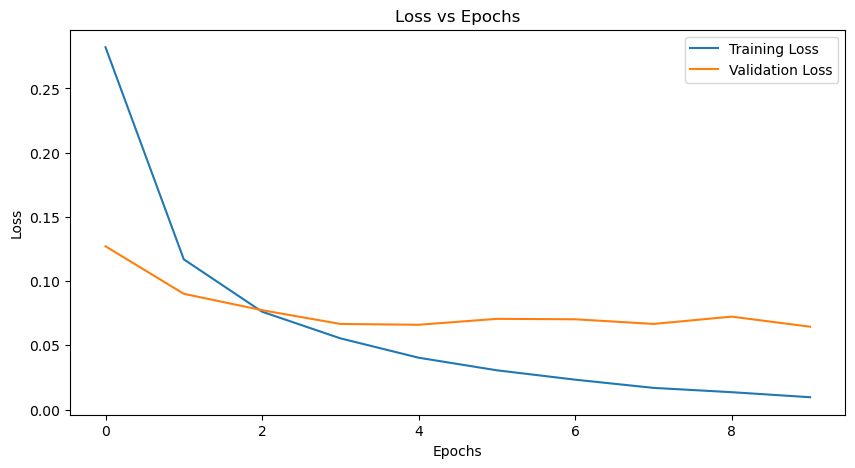

In [12]:
# 1. Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

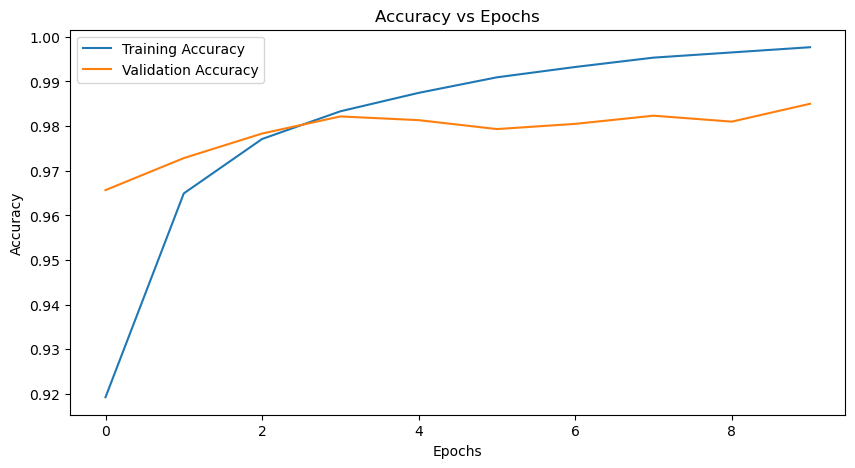

In [13]:
# 2. Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


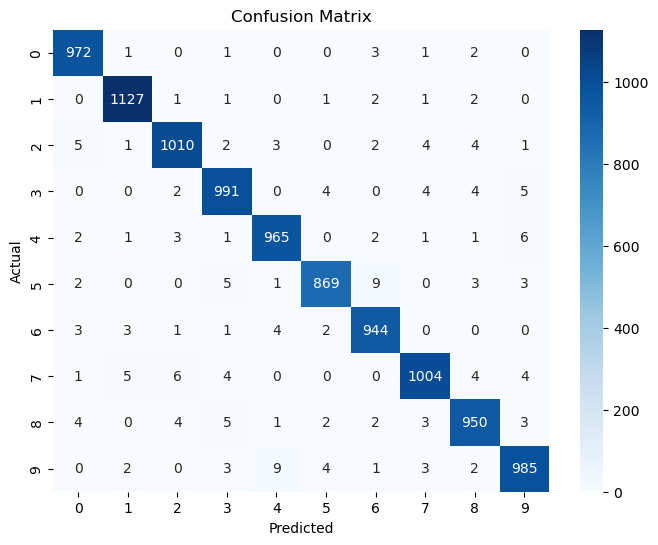

In [14]:
# 3. Confusion Matrix
y_pred = np.argmax(network.predict(test_images), axis=1)
y_true = np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

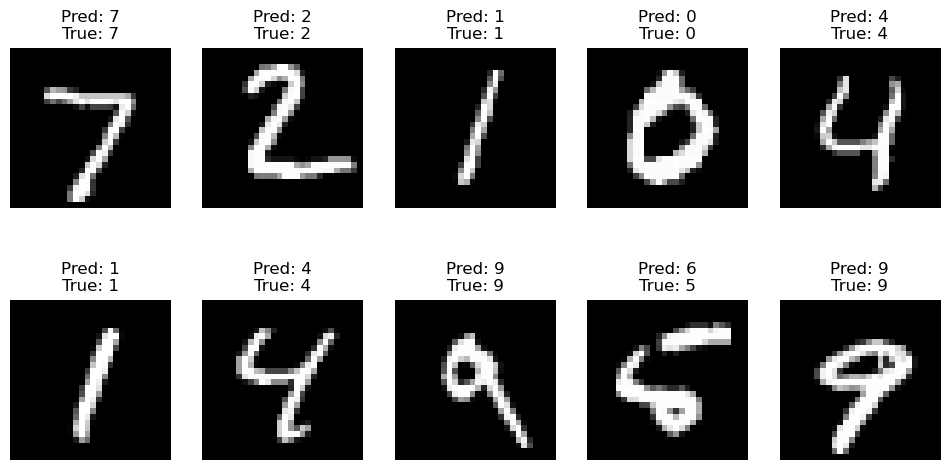

In [15]:
# 4. Sample Predictions
num_samples = 10
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_true[i]}")
    plt.axis('off')
plt.show()